In [13]:
# imports and set seed so results are random, but stil reproducable
import tensorflow as tf
import keras
from sklearn.preprocessing import OneHotEncoder
import random
import os  # Helps you manage files and folders
import sys
import cv2  # Working with images
import numpy as np
import seaborn as sns  # Helps you visualize your discoveries
import matplotlib.pyplot as plt  # To plot images
import datetime


print("tensorflow version: "+ tf.__version__)
print("keras version: ", keras.__version__)

def set_seed(seed=0):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)
  keras.utils.set_random_seed(seed)

set_seed()

tensorflow version: 2.16.2
keras version:  3.4.1


### 1. Import Model

In [14]:
chckpnt = os.listdir("checkpoints")[0]

model = keras.saving.load_model(f"checkpoints/{chckpnt}")

### 2. Load Test Image

In [15]:
"""
most_recent_file = None
most_recent_time = 0
# iterate over the files in the directory using os.scandir
for entry in os.scandir("beispiele"):
    if entry.is_file():
        # get the modification time of the file using entry.stat().st_mtime_ns
        mod_time = entry.stat().st_mtime_ns
        if mod_time > most_recent_time:
            # update the most recent file and its modification time
            most_recent_file = entry.name
            most_recent_time = mod_time
"""

img = cv2.imread(f"beispiele/cup/GPIO25_2024-07-13-21-15-26.524018.jpg")

img = cv2.resize(img, (32, 32))
img.shape


(32, 32, 3)

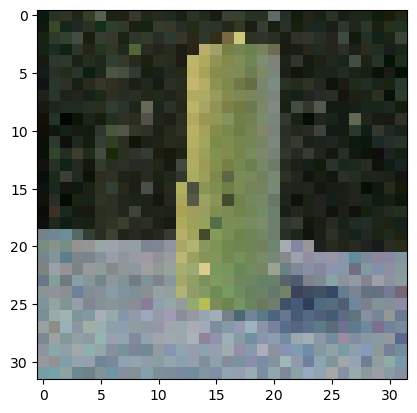

In [16]:
fig, ax = plt.subplots()

ax.imshow(img)

### 3. Predict Picture

In [17]:
confidences = model.predict(img.reshape(1, 32, 32, 3))

pred = np.argmax(confidences)

print(confidences)

print(f"Predicted: {pred} with confidence {confidences[0][pred]}")

if confidences[0][pred] > 0.5:
    print("I am confident")
else:
    print("I am not confident")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.4090885  0.4112266  0.17968495]]
Predicted: 1 with confidence 0.4112266004085541
I am not confident


### 4. Test with ratio alignment first

In [43]:
img = cv2.imread(f"beispiele/GPIO23_2024-07-14-09-09-13.510959.jpg")

print("Before:", img.shape)

height = img.shape[0]

cutoff = height // 4
#img = cv2.cr
img_resized = cv2.resize(img, (32, 32))

img_cropped = img[0:height, cutoff:height+cutoff]
img_cropped_resized = cv2.resize(img_cropped, (32, 32))

print("After:",img_resized.shape)

Before: (2464, 3280, 3)
After: (32, 32, 3)


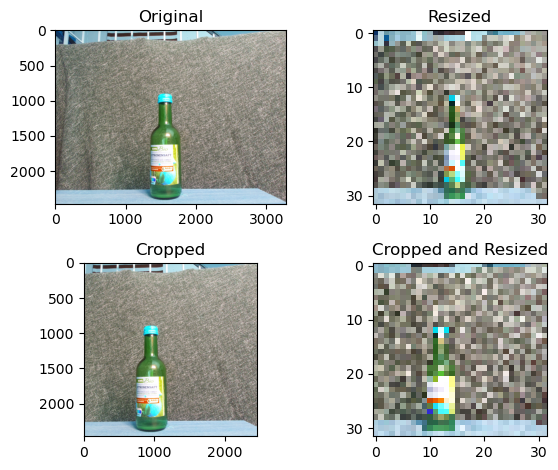

In [46]:
fig, ax = plt.subplots(2,2)

ax[0,0].imshow(img)
ax[0,0].set_title("Original")
ax[0,1].imshow(img_resized)
ax[0,1].set_title("Resized")

ax[1,0].imshow(img_cropped)
ax[1,0].set_title("Cropped")
ax[1,1].imshow(img_cropped_resized)
ax[1,1].set_title("Cropped and Resized")

plt.tight_layout()